<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
x, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
x_i, x_test, y_i, y_test=train_test_split(x,y,test_size=0.2)
x_train,x_cv,y_train,y_cv=train_test_split(x_i,y_i,test_size=0.25)

In [4]:
model=SVC(C=100,kernel='rbf',random_state=0,gamma=0.001)
model.fit(x_train,y_train)
model.predict(x_cv).shape

(1000,)

In [ ]:
#Decision_function gives you the W_t(x) +b value for the given data point.

In [11]:
model.decision_function(x_cv)

array([-1.34917583, -3.84126978, -2.74038181, -3.62386342, -1.88704312,
       -0.7427951 ,  3.07054381,  1.15622775,  0.17742995, -0.77434442,
       -3.12275509,  1.71040051,  2.51361339,  1.77817919, -1.4548911 ,
        1.96559446, -1.97535282, -3.72801318, -4.13815546, -1.59903843,
       -1.61021011, -0.30829462, -1.95067687,  0.49984294, -2.51228846,
       -2.04252547, -2.13441493, -2.61165551, -2.09643559,  1.62025157,
        0.51340245, -3.78548945, -4.56710591,  1.74419561, -3.67261428,
       -2.01269068,  1.91421457, -4.61371117, -1.3083903 ,  2.08995921,
       -3.35272339, -2.36218341, -2.80267489, -2.71179706, -0.66370648,
        1.25976891, -2.96453349, -0.3459253 ,  0.26739685, -2.6055626 ,
       -3.05075273,  0.55649703, -3.61856363,  1.49809346, -3.15331213,
        1.79176179, -3.27412365, -0.99527009, -0.07193912, -2.57348839,
       -2.46613404, -2.29376373,  0.94993916,  2.00887452,  1.60651907,
       -2.21895274, -3.37967307, -3.28711137, -2.54161669, -4.86

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [7]:
x_cv
y_cv
alpha=model.dual_coef_[0]#Alpha= gives the value as y_i* alpha_i, where alpha_i is 0 for non Support Sectors
support=model.support_vectors_#Support Vectors
b=model.intercept_#b
#𝑒𝑥𝑝(−𝛾||𝑥𝑖−𝑥𝑞||2)
gama=model.gamma#Gamma which is actually inside RBF Kernel
ys=y_train[model.support_]

In [17]:
len(alpha)==len(support)
#this shows that the support vectors alone have alpha!=0

True

In [18]:
def rbf_kernel(gama, x, x_q):
    value=np.exp(-gama*(np.sum((x-x_q)**2,axis=1)))
    return value

In [21]:
len(support)

554

In [8]:
# you can write your code here
def decision_function(alpha,x_q,support_vectors,gama,b):
    decision_surface=[]
    def rbf_kernel(gama, x, x_q):
        value=np.exp(-gama*(np.sum((x-x_q)**2,axis=1)))
        return value
    for i in range(len(x_q)):
        value=np.sum((alpha*rbf_kernel(gama,support_vectors,x_q[i])))+b
        decision_surface.append(value[0]) 
    
    return(np.array(decision_surface))


In [9]:
#Checking if the value provided matches the value provided by the library
np.all(np.round(decision_function(alpha,x_cv,support,gama,b),3)==np.round(model.decision_function(x_cv),3))

True

In [10]:
y_pred_cv=decision_function(alpha, x_cv,support,gama,b)
y_pred=decision_function(alpha, x,support,gama,b)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [11]:
y_train,y_test,y_pred_train,y_pred_test=train_test_split(y,y_pred,test_size=0.2)

In [12]:
#Converting all the y_i values as per algorithm(y+ & y-)

y_pos=(y_train[y_train==1].shape[0]+1)/(y_train[y_train==1].shape[0]+2)     #y+
y_neg=1/(y_train[y_train==0].shape[0]+2)     #y-

y_train=y_train.copy().astype('float64')  #Making a copy so that the original does not get affected
y_test=y_test.copy().astype('float64')
#print(y_new_cv)
#Replacing values
y_train[y_train==0]=y_neg
y_train[y_train==1]=y_pos

y_test[y_test==0]=y_neg
y_test[y_test==1]=y_pos

x_train=y_pred_train
x_test=y_pred_test

In [13]:
def logloss(y_actual,y_pred):#Both the values are array of details
    output=-np.mean((y_actual*np.log(y_pred))+((1-y_actual)*np.log(1-y_pred)))
    return output

In [14]:
#Initializing the weights
w_prob=np.array(0)
b_prob=np.array(0)

In [15]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    sigmoid_z=1/(1+np.exp(-z))
    # compute sigmoid(z) and return
    return sigmoid_z

In [16]:
#The z or the decision function has already been defined
#function name : decision_function


In [17]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w 
    '''
    dw=x*(y-sigmoid(w*(x)+b)-(alpha/N)*w)
    
    return dw

In [18]:
#sb should be a scalar value
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b 
    '''
    db=y-sigmoid(w*(x)+b)
    return db

In [19]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [20]:
def train(X_train,y_train,epochs,alpha,eta0,w,b,N):
    ''' In this function, we will perform sgd'''  
    train_loss = [0]
    #write your code to perform SGD
    for x in tqdm(range(epochs)):
        for i in range(len(X_train)):          
            dw=gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
            db=gradient_db(X_train[i],y_train[i],w,b)
            w=w+eta0*(dw)
            b=b+eta0*(db)
        #print('='*50)
        y_train_pred=pred(w,b,X_train)
        loss_tr=logloss(y_train,y_train_pred)
        loss_old=train_loss[-1]
        train_loss.append(loss_tr)
        loss_new=loss_tr
        print(loss_new,loss_old)
        if round(loss_new,6)==round(loss_old,6):
            break;
        else:
            continue
    return w,b,train_loss[1:]

In [21]:
N=len(x_train)
calibrated_w,calibrated_b,train_loss_proba=train(x_train,y_train,300,0.001,0.001,w_prob,b_prob,N)

  1%|█                                                                                 | 4/300 [00:00<00:18, 15.86it/s]

0.2211102708281974 0
0.2010207531622841 0.2211102708281974
0.1952874239181143 0.2010207531622841
0.19295386629503372 0.1952874239181143


  3%|██▏                                                                               | 8/300 [00:00<00:19, 15.16it/s]

0.19183190002455772 0.19295386629503372
0.19123626922020875 0.19183190002455772
0.19089848894765718 0.19123626922020875
0.190697768997743 0.19089848894765718


  4%|███▏                                                                             | 12/300 [00:00<00:19, 14.94it/s]

0.19057433172549526 0.190697768997743
0.19049644139905803 0.19057433172549526
0.1904463172991841 0.19049644139905803
0.19041356781532873 0.1904463172991841


  5%|███▊                                                                             | 14/300 [00:00<00:19, 14.58it/s]

0.19039191342678555 0.19041356781532873
0.19037745752743068 0.19039191342678555
0.19036773076881391 0.19037745752743068


  6%|████▊                                                                            | 18/300 [00:01<00:20, 14.02it/s]

0.19036114197321802 0.19036773076881391
0.19035665218599496 0.19036114197321802
0.1903535758490642 0.19035665218599496


  7%|█████▉                                                                           | 22/300 [00:01<00:19, 14.48it/s]

0.19035145675888043 0.1903535758490642
0.19034998924299626 0.19035145675888043
0.1903489673180776 0.19034998924299626
0.19034825149964565 0.1903489673180776


  7%|█████▉                                                                           | 22/300 [00:01<00:19, 13.96it/s]

0.1903477469249075 0.19034825149964565


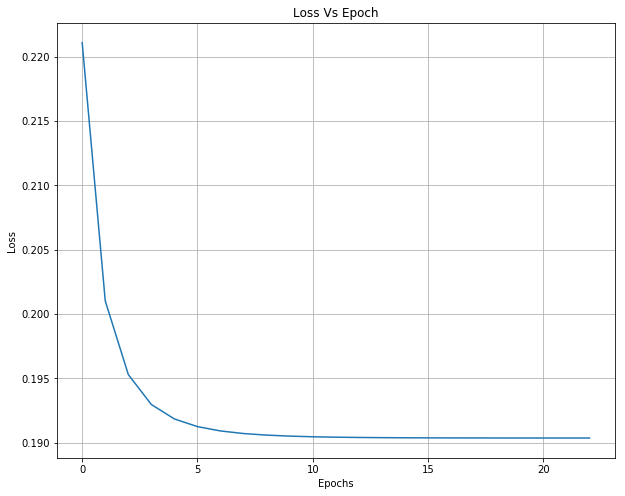

In [22]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Loss Vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(range(len(train_loss_proba)),train_loss_proba)
plt.show()

In [23]:
def final_probability(w,b,x_i):
    z=w*x_i+b
    sigmoid_z=1/(1+np.exp(-z))
    return(sigmoid_z)

x_i=y_pred_cv.copy()
calibrated_proba=final_probability(calibrated_w,calibrated_b,x_i)#Calibrated Probabilities

In [24]:
print(calibrated_proba)#Calibrated Probabilities

[1.59646782e-02 9.56296351e-01 2.53784847e-03 1.73150726e-03
 9.92678514e-01 2.35392975e-01 5.13077833e-03 2.22749010e-03
 1.51883844e-03 3.57938353e-01 4.81368447e-02 6.12389247e-02
 2.86607462e-03 6.89576375e-01 3.22695223e-03 1.01672441e-02
 3.84253627e-02 8.22324963e-02 1.18088643e-02 8.43356491e-01
 8.57657712e-02 2.98367969e-03 7.06824576e-03 6.50792994e-01
 9.98478503e-01 1.37975889e-02 3.73916938e-03 9.97506574e-01
 1.83954176e-02 9.11013085e-01 1.60083282e-03 2.54074740e-02
 7.98482612e-03 7.28718861e-04 3.56592415e-02 9.82588948e-01
 7.85284127e-01 9.71344474e-01 9.82961382e-01 4.50410418e-02
 2.02802773e-02 9.86622772e-01 1.89179430e-02 6.74371907e-02
 2.59024577e-02 3.78898122e-02 9.65200406e-01 8.01291067e-03
 5.61572009e-03 9.74279348e-01 2.22278207e-01 6.27244193e-01
 3.93661611e-03 5.14232681e-02 9.85035018e-01 8.86450537e-03
 4.60616014e-02 2.55047973e-03 5.05656798e-03 8.71599435e-03
 1.63119155e-02 9.40104709e-01 7.37101387e-01 1.83957905e-02
 9.29837644e-01 2.152666

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but interested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
